In [25]:
import numpy as np
import pandas as pd
import os
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt 
import seaborn as sns

In [26]:
def plot_venn(plusIDs, ddaIDs, level):
    plt.rcParams["font.family"] = "Arial"
    plt.figure(figsize=(4,4))

    common_ids = set(plusIDs).intersection(set(ddaIDs))
    plus_ids = set(plusIDs).difference(set(ddaIDs))
    regular_ids = set(ddaIDs).difference(set(plusIDs))

    vd = venn2(subsets=(len(plus_ids), len(regular_ids), len(common_ids)),
               set_labels=('MSFragger-DDA+', 'MSFragger-DDA'), 
               set_colors=("darkorange", "#4285F4"),
               alpha=0.8) 

    x = vd.get_label_by_id("100")
    for text in vd.set_labels:
        text.set_fontsize(12)
        if text._text.startswith('MSFragger-DDA+'):
            text.set_color("darkorange")
            text.set_x(text._x-0.08)
            text.set_y(1*text._y+0.06)
            text.set_fontweight('bold')
        else:
            text.set_color("#4285F4")
            text.set_x(text._x+0.12)
            text.set_y(1*text._y+0.08)
            text.set_fontweight('bold')

    for text in vd.subset_labels:
        text.set_fontsize(13)
        
    plt.title("Identified {}".format(level))
    plt.savefig(r"{}_vennplot.pdf".format(level), bbox_inches='tight', pad_inches=0.1)
    

DDA+ 23948
DDA 21070


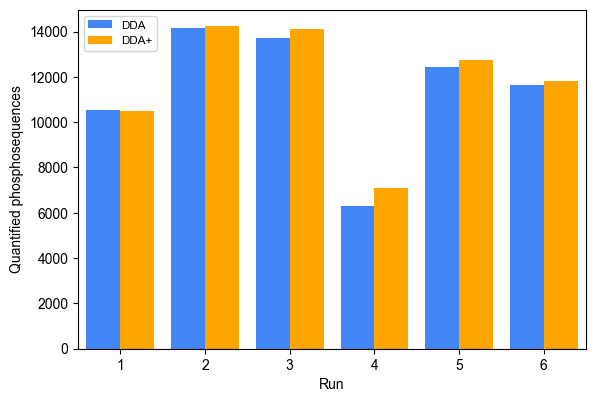

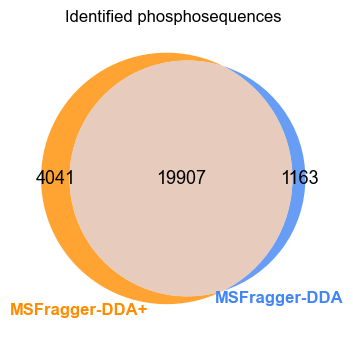

In [35]:
dda_modpept_file = "Z:/yufe/results/msfragger_ddaplus_paper/PXD012671/DDA/combined_modified_peptide.tsv"
ddap_modpept_file = "Z:/yufe/results/msfragger_ddaplus_paper/PXD012671/DDA+/combined_modified_peptide.tsv"

dda_modpept = pd.read_csv(dda_modpept_file, sep="\t")
ddap_modpept = pd.read_csv(ddap_modpept_file, sep="\t")
dda_modpept = dda_modpept.loc[dda_modpept["Modified Sequence"].str.contains("[79.9663]"),]
ddap_modpept = ddap_modpept.loc[ddap_modpept["Modified Sequence"].str.contains("[79.9663]"),]

# Number of phosphorylated peptide sequences
combined_pept_cnt = pd.DataFrame()
for r in range(1,7):
    intensity_column = str(r) + " Intensity"
    
    dda_sub = dda_modpept[["Peptide Sequence","Modified Sequence",intensity_column]].copy()
    dda_sub = dda_sub[(dda_sub[intensity_column]>0)]

    ddap_sub = ddap_modpept[["Peptide Sequence","Modified Sequence",intensity_column]].copy()
    ddap_sub = ddap_sub[(ddap_sub[intensity_column]>0)]

    pept_cnt_df = pd.DataFrame({"Type":["DDA","DDA+"],
                                "Peptide_count":[dda_sub["Peptide Sequence"].nunique(), ddap_sub["Peptide Sequence"].nunique()],
                                "Run":r})
    combined_pept_cnt = pd.concat([combined_pept_cnt, pept_cnt_df], axis=0)

sns.barplot(data=combined_pept_cnt, 
            x="Run", 
            y="Peptide_count", 
            hue="Type", 
            palette={"DDA": "#4285F4","DDA+": "orange"},
            saturation = 1)
plt.ylabel('Quantified phosphosequences')
plt.tight_layout()
plt.legend(loc="upper left", fontsize="small")
plt.gcf().set_size_inches(6, 4)
plt.savefig(r"barplot_phosphosequence.pdf", bbox_inches='tight', pad_inches=0.1) 


# Overlap of phosphopeptide sequences
print("DDA+ " + str(ddap_modpept["Peptide Sequence"].nunique()))
print("DDA " + str(dda_modpept["Peptide Sequence"].nunique()))
plot_venn(plusIDs = ddap_modpept["Peptide Sequence"], 
          ddaIDs = dda_modpept["Peptide Sequence"],
          level = "phosphosequences")


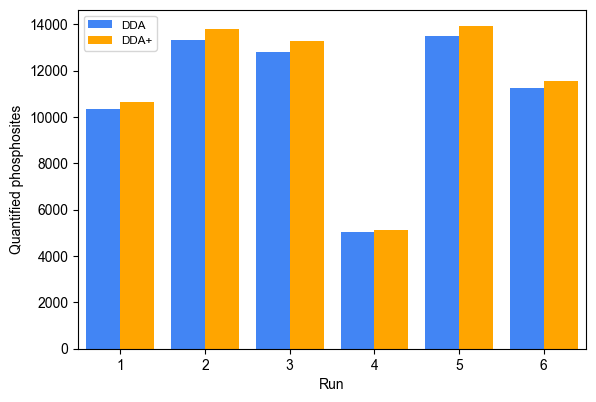

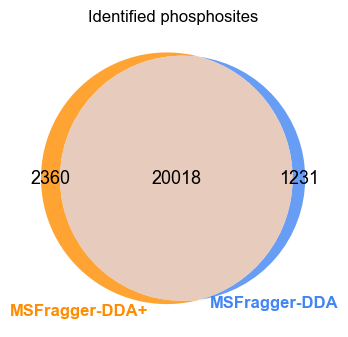

In [33]:
dda_site_file = "Z:/yufe/results/msfragger_ddaplus_paper/PXD012671/DDA/combined_site_STY_79.9663.tsv"
ddap_site_file = "Z:/yufe/results/msfragger_ddaplus_paper/PXD012671/DDA+/combined_site_STY_79.9663.tsv"
dda_site = pd.read_csv(dda_site_file, sep="\t")
ddap_site = pd.read_csv(ddap_site_file, sep="\t")


# Number of phosphosites
combined_site_cnt = pd.DataFrame()
for r in range(1,7):
    loc_prob_column = str(r) + " Localization Probability"
    intensity_column = str(r) + " Intensity"
    
    dda_sub = dda_site[["Index",loc_prob_column,intensity_column]].copy()
    dda_sub = dda_sub[(dda_sub[loc_prob_column]>0.75) & (dda_sub[intensity_column]>0)]

    ddap_sub = ddap_site[["Index",loc_prob_column,intensity_column]].copy()
    ddap_sub = ddap_sub[(ddap_sub[loc_prob_column]>0.75) & (ddap_sub[intensity_column]>0)]

    site_cnt_df = pd.DataFrame({"Type":["DDA","DDA+"],
                                "Site_count":[dda_sub["Index"].nunique(), ddap_sub["Index"].nunique()],
                                "Run":r})
    combined_site_cnt = pd.concat([combined_site_cnt, site_cnt_df], axis=0)

sns.barplot(data=combined_site_cnt, 
            x="Run", 
            y="Site_count", 
            hue="Type", 
            palette={"DDA": "#4285F4","DDA+": "orange"},
            saturation = 1)

plt.ylabel('Quantified phosphosites')
plt.tight_layout()
plt.gcf().set_size_inches(6, 4)
plt.legend(loc="upper left", fontsize="small")
plt.savefig(r"barplot_phosphosites.pdf", bbox_inches='tight', pad_inches=0.1) 


# Overlap of phosphopeptide sequences
plot_venn(plusIDs = ddap_site["Index"],
          ddaIDs = dda_site["Index"],
          level = "phosphosites")
